In [21]:
import pandas as pd
import numpy as np
#to plot the data
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline
import os
os.chdir("/Users/tomxu/Documents/NASA-Jet-Engine-Maintenance/Data/CMaps/")

In [22]:
def prepare_data(drop_cols=True):
    dependent_var = ['RUL']
    index_columns_names =  ["UnitNumber", "Cycle"]
    operational_settings_columns_names = ["OpSet"+str(i) for i in range(1,4)]
    sensor_measure_columns_names =["SensorMeasure"+str(i) for i in range(1,22)]
    input_file_column_names = index_columns_names + operational_settings_columns_names + sensor_measure_columns_names
    cols_to_drop = ['OpSet3', 'SensorMeasure1', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure10',
                    'SensorMeasure14', 'SensorMeasure16', 'SensorMeasure18', 'SensorMeasure19']
    df_train = pd.read_csv('train_FD001.txt', delim_whitespace=True, names=input_file_column_names)
    rul = pd.DataFrame(df_train.groupby('UnitNumber')['Cycle'].max()).reset_index()
    rul.columns = ['UnitNumber', 'max']
    df_train = df_train.merge(rul, on=['UnitNumber'], how='left')
    df_train['RUL'] = df_train['max'] - df_train['Cycle']
    df_train.drop('max', axis=1, inplace=True)
    df_test = pd.read_csv('test_FD001.txt', delim_whitespace=True, names=input_file_column_names)    
    if(drop_cols == True):
        df_train = df_train.drop(cols_to_drop, axis=1)
        df_test = df_test.drop(cols_to_drop, axis=1)
    y_true = pd.read_csv('RUL_FD001.txt', delim_whitespace=True, names=["RUL"])
    y_true["UnitNumber"] = y_true.index + 1
    return df_train, df_test, y_true

In [23]:
df_train, df_test, y_true = prepare_data(drop_cols=True)
df_train.shape, df_test.shape, y_true.shape

((20631, 18), (13096, 17), (100, 2))

In [24]:
df_test

,UnitNumber,Cycle,OpSet1,OpSet2,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8.4052,392,38.86,23.3735
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8.3803,393,39.02,23.3916
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8.4441,393,39.08,23.4166
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8.3917,391,39.00,23.3737
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8.4031,390,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,643.24,1599.45,1415.79,553.41,2388.02,9142.37,47.69,520.69,2388.00,8.4715,394,38.65,23.1974
13092,100,195,-0.0011,-0.0001,643.22,1595.69,1422.05,553.22,2388.05,9140.68,47.60,521.05,2388.09,8.4512,395,38.57,23.2771
13093,100,196,-0.0006,-0.0003,643.44,1593.15,1406.82,553.04,2388.11,9146.81,47.57,521.18,2388.04,8.4569,395,38.62,23.2051
13094,100,197,-0.0038,0.0001,643.26,1594.99,1419.36,553.37,2388.07,9148.85,47.61,521.33,2388.08,8.4711,395,38.66,23.2699


In [25]:
def get_label_group(rul):
    if rul <= 50:
        return 'Urgent'
    elif rul >= 51 and rul <= 125:
        return 'Short'
    elif rul >= 126 and rul <= 200:
        return 'Medium'
    else:
        return 'Long'

df_train['Label'] = df_train['RUL'].apply(get_label_group)
y_true['Label'] = y_true['RUL'].apply(get_label_group)
df_test = df_test.merge(y_true, on="UnitNumber", how="left")
df_test

,UnitNumber,Cycle,OpSet1,OpSet2,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,RUL,Label
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.20,521.72,2388.03,8.4052,392,38.86,23.3735,112,Short
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.50,522.16,2388.06,8.3803,393,39.02,23.3916,112,Short
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.50,521.97,2388.03,8.4441,393,39.08,23.4166,112,Short
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,554.07,2388.03,9045.29,47.28,521.38,2388.05,8.3917,391,39.00,23.3737,112,Short
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,554.16,2388.01,9044.55,47.31,522.15,2388.03,8.4031,390,38.99,23.4130,112,Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,643.24,1599.45,1415.79,553.41,2388.02,9142.37,47.69,520.69,2388.00,8.4715,394,38.65,23.1974,20,Urgent
13092,100,195,-0.0011,-0.0001,643.22,1595.69,1422.05,553.22,2388.05,9140.68,47.60,521.05,2388.09,8.4512,395,38.57,23.2771,20,Urgent
13093,100,196,-0.0006,-0.0003,643.44,1593.15,1406.82,553.04,2388.11,9146.81,47.57,521.18,2388.04,8.4569,395,38.62,23.2051,20,Urgent
13094,100,197,-0.0038,0.0001,643.26,1594.99,1419.36,553.37,2388.07,9148.85,47.61,521.33,2388.08,8.4711,395,38.66,23.2699,20,Urgent


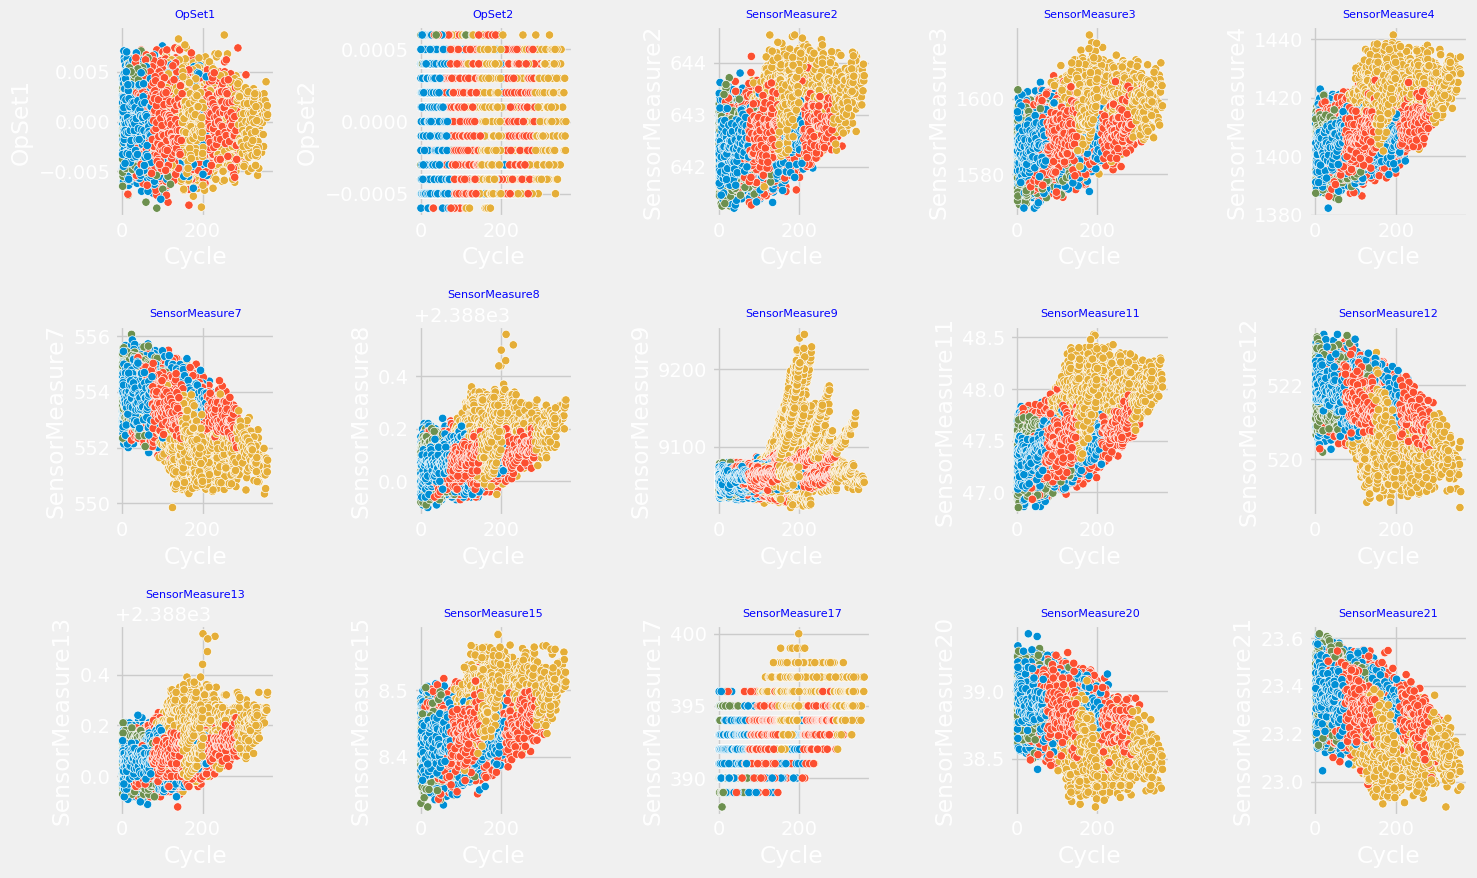

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 9))

for kk in range(1, 16):
    plt.subplot(3, 5, kk)
    sns.scatterplot(x='Cycle', y=df_train.iloc[:, 1 + kk], hue='Label', data=df_train)
    plt.title(df_train.columns[1 + kk], fontsize=8, color=[0, 0, 1])
    plt.legend().set_visible(False)

plt.tight_layout()
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler
feats = df_train.columns.drop(['UnitNumber', 'Cycle', 'RUL', "Label"])
std_scaler = StandardScaler()
df_train[feats] = std_scaler.fit_transform(df_train[feats])
df_test[feats] = std_scaler.transform(df_test[feats])

In [28]:
from sklearn.decomposition import PCA

# Extracting the selected columns for PCA
selected_data = df_train[feats]

# Performing PCA
pca = PCA()
wcoeff = pca.fit_transform(selected_data)
print(wcoeff.shape)
# Determine the number of principal components
num_components = wcoeff.shape[1]

# Creating a DataFrame with dynamic column names
score = pd.DataFrame(wcoeff, columns=[f'Principal Component {i + 1}' for i in range(num_components)])
score["Label"] = df_train['Label']
score

(20631, 15)


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 4,Principal Component 5,Principal Component 6,Principal Component 7,Principal Component 8,Principal Component 9,Principal Component 10,Principal Component 11,Principal Component 12,Principal Component 13,Principal Component 14,Principal Component 15,Label
0,-2.951544,-0.440120,-1.198484,-0.770999,0.830936,0.709659,-0.250967,0.013905,0.612198,0.225050,0.256506,-0.062500,-0.373699,-0.766431,-0.449149,Medium
1,-2.334373,-0.566075,-0.100705,-1.345184,0.978765,0.342274,0.034855,-0.330048,0.640034,0.081692,-0.194262,-0.167863,0.032749,0.406250,-0.729534,Medium
2,-2.960110,-0.459785,-0.737122,2.071258,0.610954,-1.071402,-0.516140,0.258324,0.119372,-0.145060,0.265044,-0.075620,0.795477,-0.017439,-0.036337,Medium
3,-3.365607,-0.905369,0.191465,-0.249441,-0.364328,-0.030637,0.160669,-0.117546,-1.180718,0.051249,0.497582,0.624421,1.229226,0.495532,0.274278,Medium
4,-2.411365,-0.124317,-1.087739,0.093439,-0.756667,0.322040,0.056714,-0.487738,0.240284,-0.108925,0.146170,-0.349197,0.468987,0.138490,0.091011,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,6.911526,-0.418163,-0.887796,-0.668939,-0.614182,0.583538,-0.044379,0.918033,-0.670036,-0.015721,-0.080844,-0.558163,-0.760156,0.305118,0.217175,Urgent
20627,7.058711,-0.425118,-1.775881,-0.763579,0.654311,-0.392172,-0.602791,-1.096928,-0.194517,0.455359,-0.412870,-0.908163,0.119560,0.035742,0.325188,Urgent
20628,8.037146,-0.280472,0.090336,-0.165074,-0.296360,1.152606,-0.309233,0.780331,0.418447,-1.193777,-0.676542,-0.603701,0.317154,0.272470,0.029483,Urgent
20629,7.786857,-0.372352,0.276885,1.055218,0.726346,-0.127163,-1.422842,-0.403649,0.104233,0.037129,-0.834693,-0.078401,-0.120951,-0.341488,-0.741230,Urgent


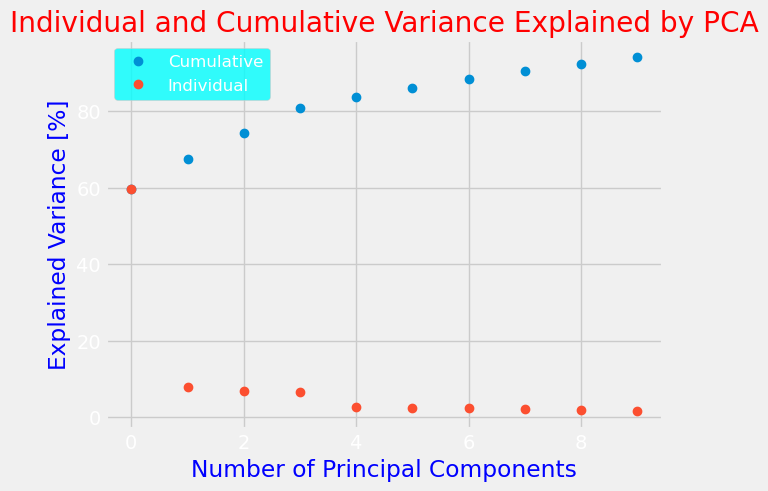

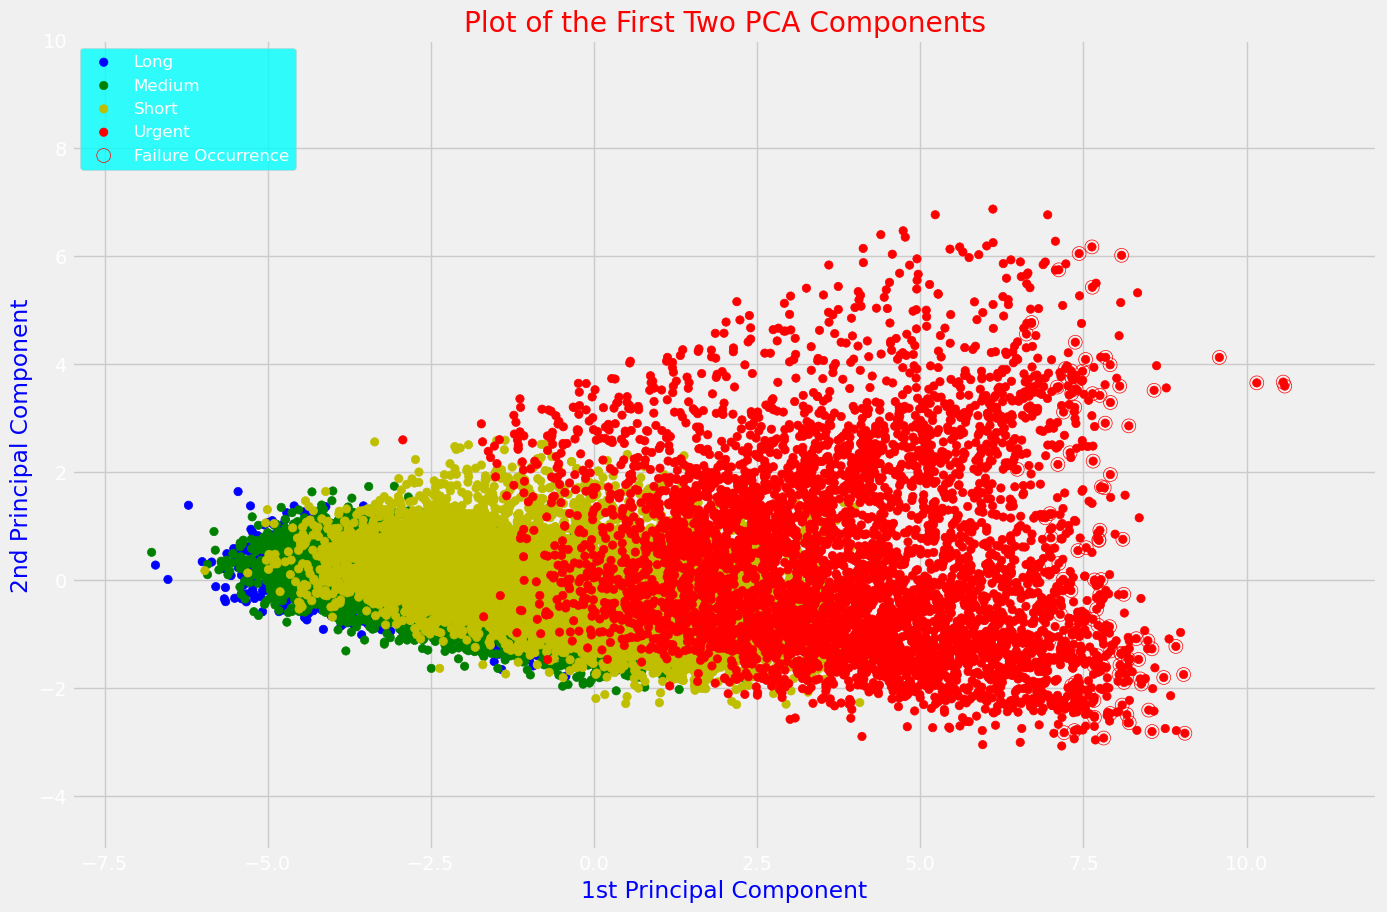

In [29]:
latent = pca.explained_variance_

# Plotting the individual and cumulative variance explained by PCA components
fig, ax = plt.subplots()
ax.plot(np.cumsum(latent[:10]) / np.sum(latent) * 100, 'o')
ax.plot(latent[:10] / np.sum(latent) * 100, 'o')
ax.set(xlabel='Number of Principal Components', ylabel='Explained Variance [%]',
       title='Individual and Cumulative Variance Explained by PCA')
ax.xaxis.label.set_color('blue')  # Color of xlabel
ax.yaxis.label.set_color('blue')  # Color of ylabel
ax.title.set_color('red')  # Color of title
ax.legend(['Cumulative', 'Individual'], loc='upper left', fontsize=12, facecolor=[0, 1, 1])
plt.show()

# Convert categorical labels to semantic color values
label_mapping = {'Urgent': 'r', 'Short': 'y', 'Medium': 'g', 'Long': 'b', 'Failure Occurrence': 'r'}
score['Label1'] = score['Label'].map(label_mapping)

# Creating a plot of the first two components
fig, ax = plt.subplots(figsize=(15, 10))
for label, d in score.groupby('Label'):
    s1 = ax.scatter(d.iloc[:, 0], d.iloc[:, 1], c=d['Label1'], label=label)
idx = df_train.groupby(["UnitNumber"])["Cycle"].transform(max) == df_train['Cycle']
s2 = ax.scatter(score[idx].iloc[:, 0], score[idx].iloc[:, 1], marker='o', s=100,
                label="Failure Occurrence", facecolors='none', edgecolors='r')
ax.legend(loc='upper left', fontsize=12, facecolor=[0, 1, 1])
ax.set(xlabel='1st Principal Component', ylabel='2nd Principal Component',
       title='Plot of the First Two PCA Components')
ax.xaxis.label.set_color('blue')  # Color of xlabel
ax.yaxis.label.set_color('blue')  # Color of ylabel
ax.title.set_color('red')  # Color of title
ax.set_xlim([-8, 12])
ax.set_ylim([-5, 10])
plt.show()

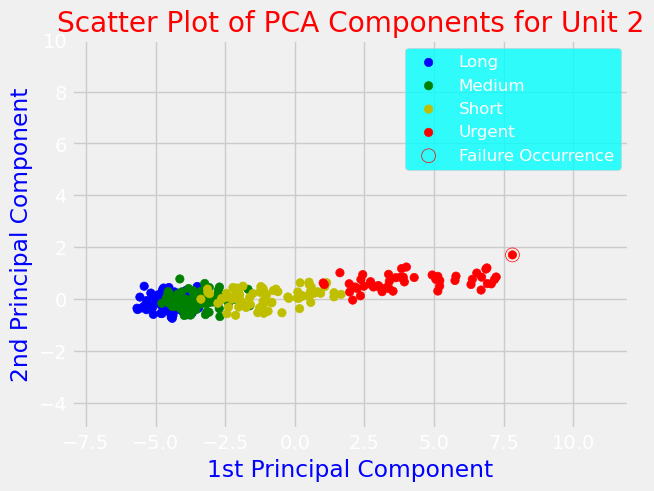

In [30]:
# Visualize a Trajectory of Unit-2 in 1st and 2nd Principal Components Plane
idx_unit = df_train['UnitNumber'] == 2
idx_failure = idx_unit & (df_train.groupby(["UnitNumber"])["Cycle"].transform(max) == df_train['Cycle'])

# Creating a scatter plot
fig, ax = plt.subplots()
for label, d in score[idx_unit].groupby('Label'):
    s1 = ax.scatter(d.iloc[:, 0], d.iloc[:, 1], c=d['Label1'], label=label)

ax.scatter(score.loc[idx_failure, "Principal Component 1"], score.loc[idx_failure, "Principal Component 2"],
           marker='o', s=100, label="Failure Occurrence", facecolors='none', edgecolors='r')
ax.legend(loc='upper right', fontsize=12, facecolor=[0, 1, 1])
ax.set(xlabel='1st Principal Component', ylabel='2nd Principal Component',
       title='Scatter Plot of PCA Components for Unit 2')
ax.xaxis.label.set_color('blue')  # Color of xlabel
ax.yaxis.label.set_color('blue')  # Color of ylabel
ax.title.set_color('red')  # Color of title
ax.set_xlim([-8, 12])
ax.set_ylim([-5, 10])
plt.show()

In [31]:
#create function to calculate Mahalanobis distance
def mahalanobis_distance(x, mean, cov_inv):
    """
    Calculate Mahalanobis distance for a point or array of points.

    Parameters:
    - x: Data point or array of points (shape: (n_samples, n_features))
    - mean: Mean vector of the distribution
    - cov_inv: Inverse of the covariance matrix

    Returns:
    - distances: Mahalanobis distances for each point
    """
    mean = mean.values.reshape((1, -1))  # Reshape mean to have the same number of columns as x
    diff = x - mean
    distances = np.sqrt(np.sum(diff @ cov_inv * diff, axis=1))
    return distances

In [32]:
# Calculate the thresholds of Mahalanobis distance to detect 5%, 1%, and 0.1% outliers
idx = (score['Label'] == "Long")

# Assuming 'mean' is the mean vector and 'cov_inv' is the inverse of the covariance matrix
mean = np.mean(score[idx].iloc[:, :2], axis=0)
cov_inv = np.linalg.inv(np.cov(score[idx].iloc[:, :2].T))

# Calculate the Mahalanobis distance for each data
d = 0.1
x1Grid, x2Grid = np.meshgrid(np.arange(-8, 8.1, d), np.arange(-8, 8.1, d))
Grid = np.column_stack((x1Grid.ravel(), x2Grid.ravel()))
print(Grid.shape, mean.shape, cov_inv.shape)

aGrid = mahalanobis_distance(Grid, mean, cov_inv)
aGrid = aGrid.reshape(x1Grid.shape)
print(aGrid.shape)
aGrid

(25921, 2) (2,) (2, 2)
(161, 161)


array([[20.53674668, 20.48211184, 20.42760986, ..., 14.4580788 ,
        14.44284654, 14.4279932 ],
       [20.31386114, 20.25913568, 20.20454405, ..., 14.25478565,
        14.24006217, 14.22572406],
       [20.09103939, 20.03622147, 19.98153836, ..., 14.05217793,
        14.03797863, 14.02417132],
       ...,
       [15.7248068 , 15.75742275, 15.79033223, ..., 23.4706811 ,
        23.53084203, 23.5910911 ],
       [15.94577573, 15.97858783, 16.01168861, ..., 23.68837199,
        23.7484169 , 23.80854975],
       [16.16687656, 16.19987919, 16.23316579, ..., 23.90621222,
        23.96614286, 24.0261612 ]])

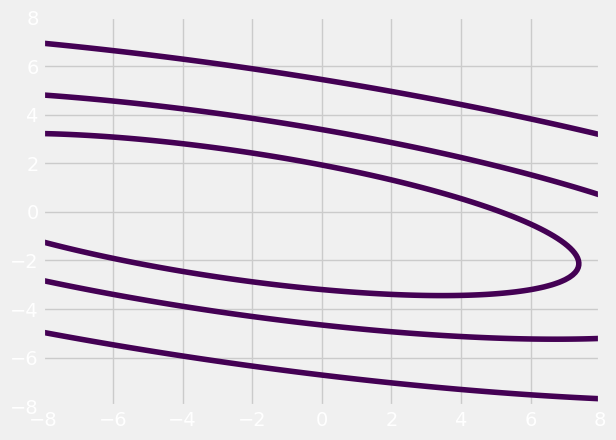

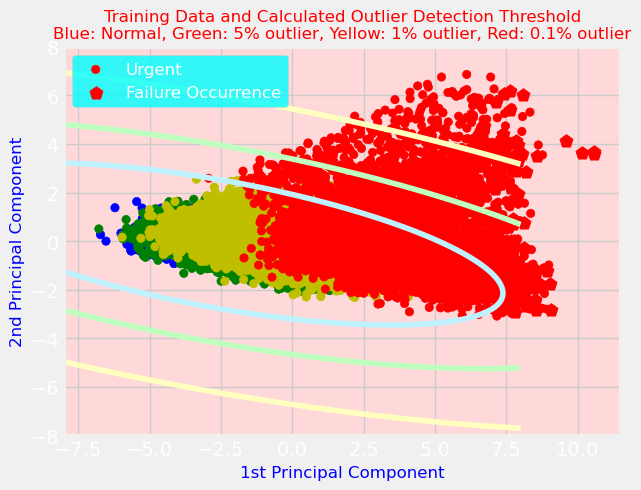

In [33]:
# Calculate the thresholds to detect 5%, 1%, and 0.1% outliers on the first two components
from scipy.stats import chi2
contours = []
th = [0.001, 0.01, 0.05]
for kk in range(3):
    lev = chi2.ppf(1 - th[kk], 2)
    contours.append(plt.contour(x1Grid, x2Grid, aGrid, levels=[lev]))

# Set the color for 5%, 1%, and 0.1% outlier regions
col5per = [0.75, 0.95, 1]
col1per = [0.75, 1, 0.75]
col01per = [1, 1, 0.75]
colAnomaly = [1, 0.85, 0.85]

# Set the color for 5%, 1%, and 0.1% outlier regions
colors = [col01per, col1per, col5per]

# Plot the result
plt.figure()
for kk, contour in enumerate(contours):
    plt.contour(contour, colors=[colors[kk]])

for label, d in score.groupby('Label'):
    s1 = plt.scatter(d.iloc[:, 0], d.iloc[:, 1], c=d['Label1'], label=label)

idx = (df_train.groupby(["UnitNumber"])["Cycle"].transform(max) == df_train['Cycle'])
s2 = plt.scatter(score[idx].iloc[:, 0], score[idx].iloc[:, 1], c='r', marker='p',
                 s=100, facecolors='w', label='Failure Occurrence')
plt.legend(handles=[s1, s2], loc='upper left', fontsize=12, facecolor=[0, 1, 1])
plt.gca().set_facecolor(colAnomaly)
plt.box(True)  # Set the box around the plot
plt.gca().set_axis_on()
# Set the color of xlabel, ylabel, and title
plt.xlabel('1st Principal Component', fontsize=12, color='blue')
plt.ylabel('2nd Principal Component', fontsize=12, color='blue')
plt.title('Training Data and Calculated Outlier Detection Threshold\n'
          'Blue: Normal, Green: 5% outlier, Yellow: 1% outlier, Red: 0.1% outlier', fontsize=12, color='red')
ax.set_xlim([-8, 12])
ax.set_ylim([-5, 10])
plt.show()

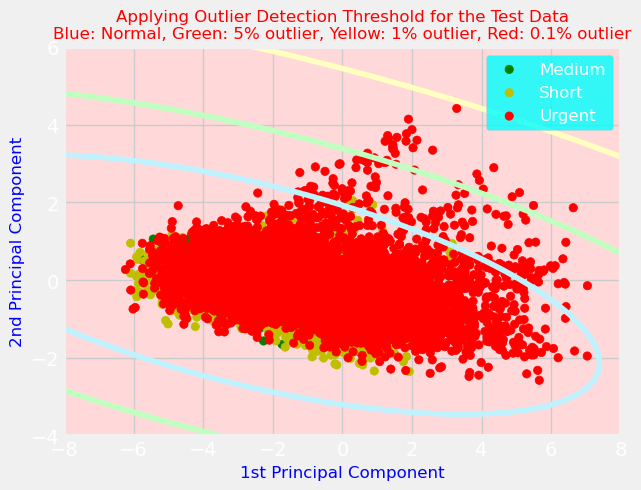

In [34]:
# Convert sensor data into PCA components
wcoeff_test = pca.transform(df_test[feats])
score_test = pd.DataFrame(wcoeff_test, columns=[f'Principal Component {i + 1}' for i in range(wcoeff_test.shape[1])])
score_test["Label"] = df_test["Label"]
score_test['Label1'] = score_test['Label'].map(label_mapping)

# Plot the result
fig, ax = plt.subplots()

# Plot contours for different outlier detection thresholds
for kk, contour in enumerate(contours):
    ax.contour(contour, colors=[colors[kk]])

# Scatter plot of PCA components for the test data
for label, d in score_test.groupby('Label'):
    s1 = ax.scatter(d.iloc[:, 0], d.iloc[:, 1], c=d['Label1'], label=label)

# Legend
legend = ax.legend(loc='upper right', fontsize=12, facecolor=[0, 1, 1])

# Set plot properties
ax.set_facecolor(colAnomaly)
ax.set_xlabel('1st Principal Component', fontsize=12, color="blue")
ax.set_ylabel('2nd Principal Component', fontsize=12, color="blue")
ax.set_title('Applying Outlier Detection Threshold for the Test Data\n'
             'Blue: Normal, Green: 5% outlier, Yellow: 1% outlier, Red: 0.1% outlier', fontsize=12, color="red")
ax.set_xlim([-8, 8])
ax.set_ylim([-4, 6])
# Show the plot
plt.show()

Though Hotelling’s T-square method is applicable for many multi-dimensional data sets, this method has a fundamental assumption that the data follow a unimodal distribution. So, when the data follows multimodal distribution, other PdM techniques should be applied. Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a multiple Gaussian distribution. Thus, by estimating mean and variance values for each Gaussian distribution from observed data, x percent outliers can be detected. To calculate the maximum likelihood estimation of Gaussian mixture model, Expectation-Maximization (EM) algorithm is commonly used. To visualize results, I would like to construct GMM using only the first two PCA components:

First, the group of data points labeled 'long' is assumed as a normal condition.

Next, the thresholds to detect 5%, 1% and 0.1% outliers are calculated by using GMM.

Finally, I would like to create a plot of the first two components with these thresholds.

/Users/tomxu/miniforge3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


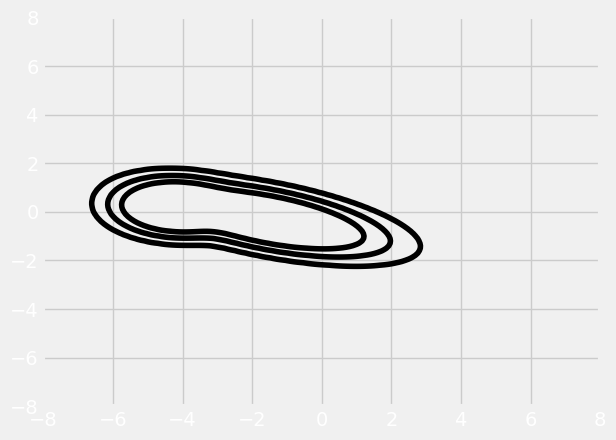

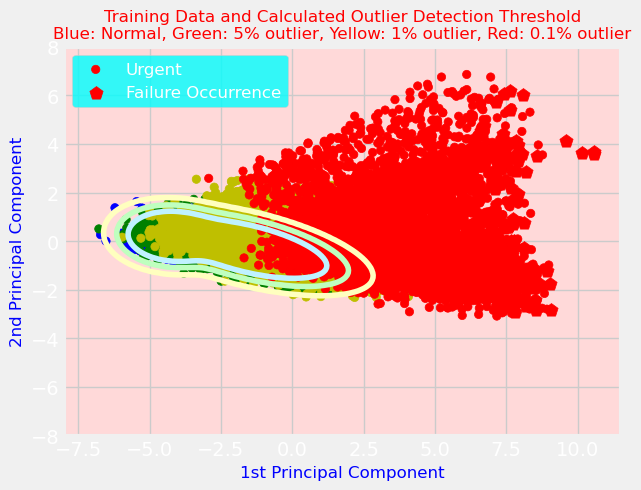

In [35]:
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

# Calculate the thresholds to detect 5%, 1%, and 0.1% outliers
# Optimum number of clusters is calculated based on Akaike's Information Criterion (AIC).
idx = (score['Label'] == 'Long')
mdlGM = []
AIC = []

# Calculate GMM by changing the total number of clusters to 1~4
for kk in range(1, 5):
    mdl = GaussianMixture(n_components=kk, max_iter=500, random_state=0)
    mdl.fit(score[idx].iloc[:, :2])
    mdlGM.append(mdl)
    AIC.append(mdl.aic(score[idx].iloc[:, :2]))

# Find the optimum number of clusters based on AIC
numCluster = np.argmin(AIC)

# Construct the GMM
bestMdlGM = GaussianMixture(n_components=numCluster, max_iter=500, random_state=0)
bestMdlGM.fit(score[idx].iloc[:, :2])

d = 0.1
x1Grid, x2Grid = np.meshgrid(np.arange(-8, 8 + d, d), np.arange(-8, 8 + d, d))
aGrid = np.exp(bestMdlGM.score_samples(np.column_stack((x1Grid.ravel(), x2Grid.ravel()))))
aGrid = aGrid.reshape(x1Grid.shape)

# Calculate the thresholds to detect 5%, 1%, and 0.1% outliers
th = [0.001, 0.01, 0.05]
C = []

sorted_indices = np.argsort(aGrid.ravel())[::-1]
sorted_values = np.sort(aGrid.ravel())[::-1]
accum = np.cumsum(sorted_values * d * d)

# Calculate the thresholds to detect 5%, 1%, and 0.1% outliers
for kk in range(3):
    idx = np.argmax(accum > (1 - th[kk]))
    C.append(plt.contour(x1Grid, x2Grid, aGrid, levels=[sorted_values[idx]], colors='k'))

# Plot the result
plt.figure()
for kk, contour in enumerate(C):
    plt.contour(contour, colors=[colors[kk]])

for label, d in score.groupby('Label'):
    s1 = plt.scatter(d.iloc[:, 0], d.iloc[:, 1], c=d['Label1'], label=label)

idx = (df_train.groupby(["UnitNumber"])["Cycle"].transform(max) == df_train['Cycle'])
s2 = plt.scatter(score[idx].iloc[:, 0], score[idx].iloc[:, 1], c='r',
                 marker='p', s=100, facecolors='w', label='Failure Occurrence')

plt.legend(handles=[s1, s2], loc='upper left', fontsize=12, facecolor=[0, 1, 1])
plt.gca().set_facecolor(colAnomaly)
plt.xlabel('1st Principal Component', fontsize=12, color='blue')
plt.ylabel('2nd Principal Component', fontsize=12, color='blue')
plt.title('Training Data and Calculated Outlier Detection Threshold\n'
          'Blue: Normal, Green: 5% outlier, Yellow: 1% outlier, Red: 0.1% outlier', fontsize=12, color='red')
plt.show()

In this process, these thresholds (which can detect 5%, 1% and 0.1% outliers) are applied to the test data set. The result is shown by creating a plot of the first two principal components with test set and these thresholds. In this plot, conditions of each engine are shown by changing colors for each data point. In real situaiton, only the positions of each data point and the thresholds for outlier detection are available. As shown in this plot, the thresholds for outlier detection calcuated by the GMM would be another helpful tool to detect anomalies and foresee machine failure during normal operation. In this example, all the 'urgent' condition in the test set can be detected by using the threshold for 1% outlier detection.

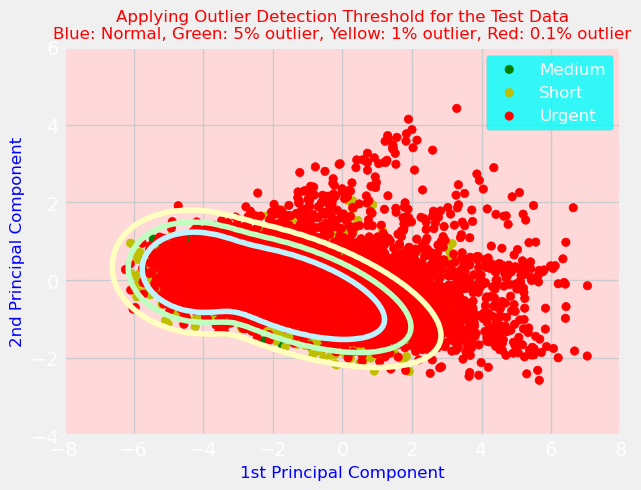

In [36]:
# Plot the result
fig, ax = plt.subplots()

# Plot contours for different outlier detection thresholds
for kk, contour in enumerate(C):
    ax.contour(contour, colors=[colors[kk]])

# Scatter plot of PCA components for the test data
for label, d in score_test.groupby('Label'):
    s1 = ax.scatter(d.iloc[:, 0], d.iloc[:, 1], c=d['Label1'], label=label)

# Legend
legend = ax.legend(loc='upper right', fontsize=12, facecolor=[0, 1, 1])

# Set plot properties
ax.set_facecolor(colAnomaly)
ax.set_xlabel('1st Principal Component', fontsize=12, color="blue")
ax.set_ylabel('2nd Principal Component', fontsize=12, color="blue")
ax.set_title('Applying Outlier Detection Threshold for the Test Data\n'
             'Blue: Normal, Green: 5% outlier, Yellow: 1% outlier, Red: 0.1% outlier', fontsize=12, color="red")
ax.set_xlim([-8, 8])
ax.set_ylim([-4, 6])
# Show the plot
plt.show()

The previous methods, Hotelling’s T-square method and Gaussian mixture model, use Gaussian distribution-based parametric model. However, in practical situation, sometimes data distribution does not have explicit clusters or, in more severe case, cannot be grasped for many reasons, such as large number of dimensions. In such a case, non-parametric model can be applicable. one class SVM, one of typical non-parametric classification method, can detect an x percent outliers from a given data set. To visualize results, I would like to apply One-Class SVM to the first two PCA components:

First, the group of data points labeled 'long' is assumed as a normal condition.

Next, the thresholds to detect 5%, 1% and 0.1% outliers are calculated by using One-Class SVM method.

Finally, I would like to create a plot of the first two components with these thresholds.

/Users/tomxu/miniforge3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(
/Users/tomxu/miniforge3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(
/Users/tomxu/miniforge3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(


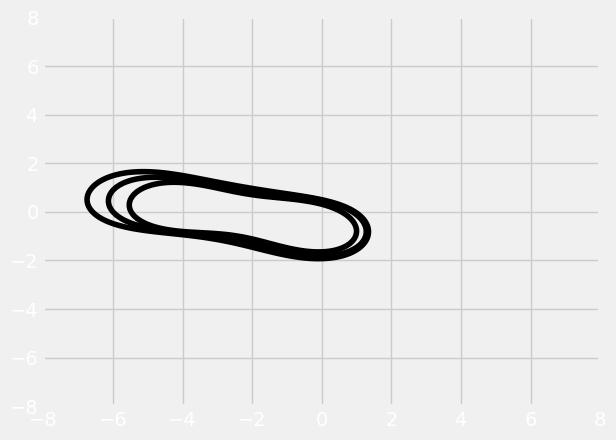

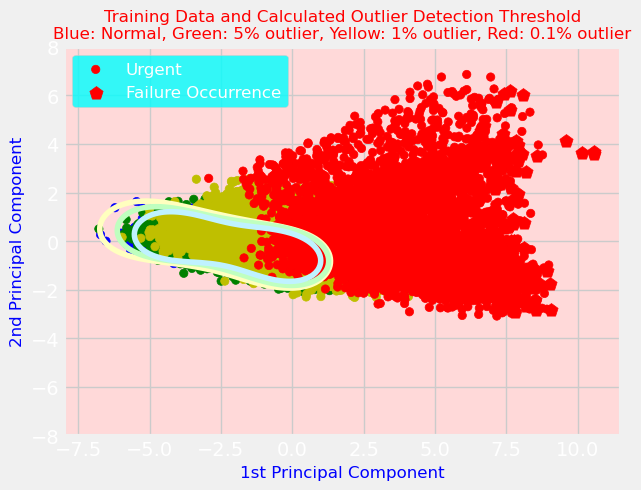

In [38]:
from sklearn.svm import OneClassSVM

# Calculate the thresholds to detect 5%, 1% and 0.1% outliers
idx = score['Label'] == 'Long'
th = [0.001, 0.01, 0.05]
cSVM = []

d = 0.1
x1Grid, x2Grid = np.meshgrid(np.arange(-8, 8.1, d), np.arange(-8, 8.1, d))

for kk in range(3):
    mdl= OneClassSVM(kernel='rbf', nu=th[kk])
    mdl.fit(score[idx].iloc[:, :2])
    aGrid = mdl.decision_function(np.c_[x1Grid.ravel(), x2Grid.ravel()])
    aGrid = aGrid.reshape(x1Grid.shape)
    cSVM.append(plt.contour(x1Grid, x2Grid, aGrid, levels=[0], colors='k'))

# Plot the result
plt.figure()
for kk, contour in enumerate(cSVM):
    plt.contour(contour, colors=[colors[kk]])

for label, d in score.groupby('Label'):
    s1 = plt.scatter(d.iloc[:, 0], d.iloc[:, 1], c=d['Label1'], label=label)

idx = (df_train.groupby(["UnitNumber"])["Cycle"].transform(max) == df_train['Cycle'])
s2 = plt.scatter(score[idx].iloc[:, 0], score[idx].iloc[:, 1], c='r',
                 marker='p', s=100, facecolors='w', label='Failure Occurrence')
plt.legend(handles=[s1, s2], loc='upper left', fontsize=12, facecolor=[0, 1, 1])
plt.gca().set_facecolor(colAnomaly)
plt.xlabel('1st Principal Component', fontsize=12, color='blue')
plt.ylabel('2nd Principal Component', fontsize=12, color='blue')
plt.title('Training Data and Calculated Outlier Detection Threshold\n'
          'Blue: Normal, Green: 5% outlier, Yellow: 1% outlier, Red: 0.1% outlier', fontsize=12, color='red')
plt.show()

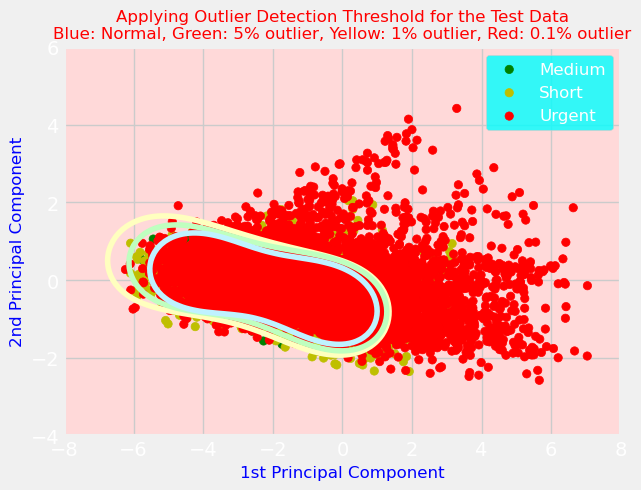

In [39]:
# Plot the result
fig, ax = plt.subplots()

# Plot contours for different outlier detection thresholds
for kk, contour in enumerate(cSVM):
    ax.contour(contour, colors=[colors[kk]])

# Scatter plot of PCA components for the test data
for label, d in score_test.groupby('Label'):
    s1 = ax.scatter(d.iloc[:, 0], d.iloc[:, 1], c=d['Label1'], label=label)

# Legend
legend = ax.legend(loc='upper right', fontsize=12, facecolor=[0, 1, 1])

# Set plot properties
ax.set_facecolor(colAnomaly)
ax.set_xlabel('1st Principal Component', fontsize=12, color="blue")
ax.set_ylabel('2nd Principal Component', fontsize=12, color="blue")
ax.set_title('Applying Outlier Detection Threshold for the Test Data\n'
             'Blue: Normal, Green: 5% outlier, Yellow: 1% outlier, Red: 0.1% outlier', fontsize=12, color="red")
ax.set_xlim([-8, 8])
ax.set_ylim([-4, 6])
# Show the plot
plt.show()